# K-Means

### Algoritmo clássico de agrupamento particional
* Defini-se o valor de **k**
* Cada grupo é associado a um **centroid** (ponto central)
* Cada objeto é atribuído ao grupo com centroid mais próximo
* Algoritmo simples

**@autor: [Juarez Monteiro](https://jrzmnt.github.io).**

---

### Observação sobre este Notebook

Este material possui o foco em realizar um agrupamento através do algoritmo ***K-Means*** com o $k=2$ para a base abaixo, e utilizaremos os *centroids* $c1(3,1)$ e $c2(1,4)$. Para verificarmos a qualidade do processo, iremos calcular o ***SSE*** e o ***SSWC*** do agrupamento.


| #      | $X$ | $Y$  |
| -------|:---:| ----:|
| 1)     | 1   |  1   |
| 2)     | 1   |  2   |
| 3)     | 2   |  1   |
| 4)     | 3   |  2   |
| 5)     | 3   |  4   |
| 6)     | 4   |  4   |

---

### Primeiro iremos iniciar com os *imports* necessários
* A lib Numpy para facilitar nossas futuras manipulações em estruturas de dados
* E a Matplotlib para tornar nossos exemplos um pouco mais visuais

In [1]:
import numpy as np
import matplotlib.pyplot as plt

---
### Declarando as variáveis necessárias
* Neste passo iremos declarar os pontos apresentados na base e os *centroids* iniciais

In [2]:
x = np.array([1, 1, 2, 3, 3, 4]) # valores do atributo x para os objetos
y = np.array([1, 2, 1, 2, 4, 4]) # valores do atributo y para os objetos
c1 = np.array([3, 1]) # valores de x e y para o centroid 1
c2 = np.array([1, 4]) # valores de x e y para o centroid 1

---
### Definindo a função de distância
Conforme visto em aula, iremos calcular a similaridade através da ***distância Euclidiana***

$$
\sqrt{\sum_{i=1}^{n}(q_i - p_i)^2}
$$

*Onde $p$ e $q$ são pontos em um espaço Euclidiano de $n$ dimensões*

In [3]:
def distance_calc(x,y,c1,c2):
    
    dist_c1 = np.sqrt((x-c1[0])**2 + (y-c1[1])**2)
    dist_c2 = np.sqrt((x-c2[0])**2 + (y-c2[1])**2)
    
    return dist_c1, dist_c2


dist_c1, dist_c2 = distance_calc(x,y,c1,c2)
print 'Distância dos objetos para o Centroid 1: %s' % dist_c1
print 'Distância dos objetos para o Centroid 2: %s' % dist_c2

Distância dos objetos para o Centroid 1: [2.         2.23606798 1.         1.         3.         3.16227766]
Distância dos objetos para o Centroid 2: [3.         2.         3.16227766 2.82842712 2.         3.        ]


---
### Definindo a função para a escolha dos grupos
* Para atribuirmos os objetos para um dos dois grupos (lembrando que $k=2$) nós devemos verificar a distância dos objetos aos centroids
* Feito isso nós iremos atribuir os objetos ao grupo do centroid mais próximo a ele

In [4]:
def choose_cluster(dist_c1, dist_c2):

    cluster_1 = np.array([])
    cluster_2 = np.array([])
    
    for i in range(len(x)):
        if dist_c1[i] < dist_c2[i]:
            cluster_1 = np.append(cluster_1, i)
            
        else:
            cluster_2 = np.append(cluster_2, i)
    
    return cluster_1, cluster_2


cluster_1, cluster_2 = choose_cluster(dist_c1, dist_c2)
print('Grupo 1: %s' % cluster_1)
print('Grupo 2: %s' % cluster_2)

Grupo 1: [0. 2. 3.]
Grupo 2: [1. 4. 5.]


---
### Recalculando os centroids...
* Lembrando que para recalcular os centroids nós iremos fazer a média dos objetos para cada grupo

In [5]:
def recalc_centroids(cluster_1, cluster_2):
    
    new_c1 = np.array([np.average([x[int(i)] for i in cluster_1]), 
                       np.average([y[int(i)] for i in cluster_1])
                      ])
    
    new_c2 = np.array([np.average([x[int(i)] for i in cluster_2]), 
                       np.average([y[int(i)] for i in cluster_2])
                      ])

    return new_c1, new_c2


new_c1, new_c2 = recalc_centroids(cluster_1, cluster_2)
print 'Novo Centroid 1: %s' % new_c1
print 'Novo Centroid 2: %s' % new_c2

Novo Centroid 1: [2.         1.33333333]
Novo Centroid 2: [2.66666667 3.33333333]


---
### Avaliando Agrupamentos com o SSE e o SSWC

#### - SSE
* Medida mais comum é a Soma dos Erros Quadráticos (SSE - *Sum of Squared Errors*)
    * Para cada objeto, o erro é a distância ao grupo mais próximo
    * Para calcular o SSE, elevamos os erros ao quadrado e os somamos<br><br>
    $$
    SSE=\sum_{i=1}^{k}\sum_{x \in C_i}dist^2(m_i, x)
    $$
    <br>
    *Onde $x$ é o objeto do grupo $C_i$ e $m_i$ é o centroid do grupo $C_i$*<br><br>
    
    * Com isso, dado dois agrupamentos, podemos escolher o de menos SSE
        * Mas atenção! Apenas compare agrupamentos **de mesmo $k$**
        
    * Quanto **menor o SSE**, mais compactos (coesos) são os grupos, pois minimizar o SSE significa minimizar a variância intra-grupo!
      
#### - SSWC
* Silhueta Simplificada (SSWC)

$$
s(i) = \frac{b(i)-a(i)}{max\{a(i),b(i)\}}
$$

<br>

$$
SWC=\frac{1}{N}\sum_{i=1}^{N}s(i)
$$

* $a(i)$ e $b(i)$ são calculados como a distância do i-ésimo objeto ao centróide do cluster em questão
    * $a(i)$ = dissimilaridade média do i-ésimo objeto ao seu cluster
    * $b(i)$ = dissimilaridade média do i-ésimo objeto ao cluster do vizinho mais próximo <br><br>
* Propriedade favorável: $SWC \in [-1, +1]$


In [13]:
def sse_calc(dist_c1, dist_c2):
    
    sse = np.sum(np.minimum(dist_c1, dist_c2)**2)
    return sse


def sswc_calc(dist_c1, dist_c2):
     
    sswc = np.average(np.absolute((dist_c2-dist_c1))/np.maximum(dist_c1, dist_c2))
    return sswc


sse = sse_calc(dist_c1, dist_c2)
sswc = sswc_calc(dist_c1, dist_c2)
print('SSE: %.2f' % sse)
print('SSWC: %.2f' % sswc)

SSE: 4.25
SSWC: 0.72


---
### Definindo uma função para plot

In [7]:
def plot_kmeans(x, y, cluster_1, cluster_2, c1, c2, iteration):
    
    plt.figure()
    plt.plot([x[int(i)] for i in cluster_1], [y[int(i)] for i in cluster_1], 'ro', label='Group 1')
    plt.plot([x[int(i)] for i in cluster_2], [y[int(i)] for i in cluster_2], 'go', label='Group 2')
    plt.plot(c1[0], c1[1], 'b*', label='Centroids')
    plt.plot(c2[0], c2[1], 'b*')
    plt.annotate(
        '(%.1f, %.1f)' % (c1[0], c1[1]),
        xy=(c1[0], c1[1]), arrowprops=dict(arrowstyle='->'), xytext=(c1[0], c1[1]+0.3))
        
    plt.annotate(
        '(%.1f, %.1f)' % (c2[0], c2[1]),
        xy=(c2[0], c2[1]), arrowprops=dict(arrowstyle='->'), xytext=(c2[0], c2[1]-0.5))

    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    
    plt.title('Iteration %i' %iteration)

---
### Pronto, agora é só repetir até o algoritmo convergir!
* Em outras palavras até os centroids não mudarem mais

Iteration 1
Iteration 2
Iteration 3
---
Stoped in iteration 3


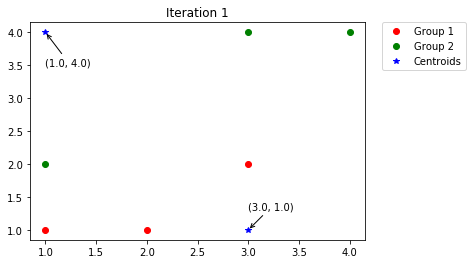

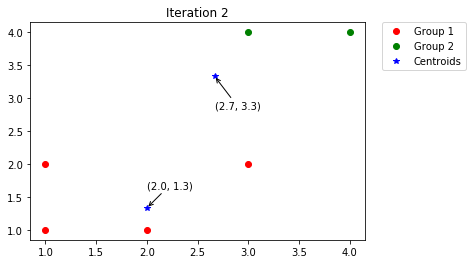

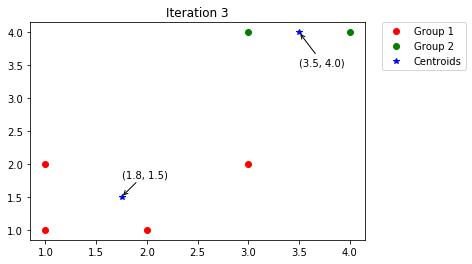

In [22]:
x = np.array([1, 1, 2, 3, 3, 4]) # valores do atributo x para os objetos
y = np.array([1, 2, 1, 2, 4, 4]) # valores do atributo y para os objetos
c1 = np.array([3, 1]) # valores de x e y para o centroid 1
c2 = np.array([1, 4]) # valores de x e y para o centroid 1
i = 0

while True:
    print('Iteration %i' % (i+1))
    
    dist_c1, dist_c2 = distance_calc(x,y,c1,c2)
    cluster_1, cluster_2 = choose_cluster(dist_c1, dist_c2)
    new_c1, new_c2 = recalc_centroids(cluster_1, cluster_2)
    
    i+=1
    
    sse = sse_calc(dist_c1, dist_c2)
    sswc = sswc_calc(dist_c1, dist_c2)
    
    plot_kmeans(x, y, cluster_1, cluster_2, c1, c2, i)
    
    if np.array_equal(c1,new_c1) and np.array_equal(c2,new_c2):
        print('---')
        print('Stoped in iteration %i' %i)
        break
    
    
    
    c1, c2 = new_c1, new_c2